This notebook will solely focus on creating what is needed for the study on the depth of the hole

* The pipeline will be: 
    * Set parameters in COMSOL
    * Redo mesh
    * Run the parameteric study
    * Save the dispersion curve information into a text file
    * Plot the dispersion curve with the shear line plotted
    * Find the first branch frequency, record this frequency value
    * Save a movie of the first branch
    * Add that into the table within the keynote file

In [16]:
%matplotlib widget

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import brentq
import os 
import mplcursors
sns.set()

In [18]:
sns.set_palette("husl", 8)

sns.set(rc={#"axes.facecolor":"#e6e6e6",
            "axes.grid":True})#,
#            'axes.labelsize':30,
#            'figure.figsize':(20.0, 15.0),
#            'xtick.labelsize':15,
#            'ytick.labelsize':15})
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})

### Wave speeds

In [19]:
def Rayleigh_func(c):
    return (2.- (c/cS)**2)-(4*(1- c**2/cS**2)**(1/2.))*(1 - (c**2/cP**2)**(1/2.)) 

In [20]:
# values of acrylic
E = 5.5e9 #[Pa]  
nu = 0.35 #
rho = 1190 #[kg/m^3]

mu = E/(2*(1+nu)) #shear modulus

#c_p2= \sqrt{\frac{\lambda + 2\mu}{\rho}
cP = np.sqrt(E / rho)
cS = np.sqrt(mu/rho)
#cS = np.sqrt((E+((4/3.)*mu))/rho)
cR, info = brentq(Rayleigh_func,100,1000,full_output=True)    

print('mu : ', mu)
print('cP : ', cP)
print('cS : ', cS)
print('cR : ',cR)
print('info : ',info)

k_array =  np.arange(0, 100,10)

freq_cP = cP*k_array
freq_cS = cS*k_array
freq_cR = cR*k_array

print(k_array)
print(freq_cP)
print(freq_cS)
print(freq_cR)

#plt.plot(k_array,freq_cP,'g',label='Pressure Wave')
#plt.plot(k_array/(2*np.pi),freq_cS,'m--', label='Shear Wave')
#plt.plot(k_array,freq_cR,'k:', label='Rayleigh Wave')
#plt.legend()
#plt.show()

mu :  2037037037.037037
cP :  2149.848538733787
cS :  1308.3561554266819
cR :  981.5904971965783
info :        converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 981.5904971965783
[ 0 10 20 30 40 50 60 70 80 90]
[     0.          21498.48538734  42996.97077468  64495.45616201
  85993.94154935 107492.42693669 128990.91232403 150489.39771137
 171987.8830987  193486.36848604]
[     0.          13083.56155427  26167.12310853  39250.6846628
  52334.24621707  65417.80777133  78501.3693256   91584.93087987
 104668.49243413 117752.0539884 ]
[    0.          9815.90497197 19631.80994393 29447.7149159
 39263.61988786 49079.52485983 58895.42983179 68711.33480376
 78527.23977573 88343.14474769]


In [27]:
# 0mm
data_NoRes_hole0mm = pd.read_csv('../data/sims/study_0baseline/Acrylic_NoResonator_0mmHole.txt',delimiter = '\t')
data_NoRes_hole0mm.columns= ["k","lambda","freq"]
data_NoRes_hole0mm.k = data_NoRes_hole0mm.k/(2*np.pi)
print('no hole')
print(data_NoRes_hole0mm.head(3))
print()

# 0mm - 0.5 mm from top
data_NoRes_6mmHole_dtop500nm = pd.read_csv('../data/sims/study_2distanceFromTop/Acrylic_NoResonator_6mmHole_dtop500nm.txt',delimiter = '\t')
data_NoRes_6mmHole_dtop500nm.columns= ["k","lambda","freq"]
data_NoRes_6mmHole_dtop500nm.k = data_NoRes_6mmHole_dtop500nm.k/(2*np.pi)
print('6mm hole ; 0.5 mm from top')
print(data_NoRes_6mmHole_dtop500nm.head(3))
print()


# 6mm hole - 1mm from top
data_NoRes_6mmHole_dtop1mm = pd.read_csv('../data/sims/study_2distanceFromTop/Acrylic_NoResonator_6mmHole_dtop1mm_mesh_physicsEXfine.txt',delimiter = '\t')
data_NoRes_6mmHole_dtop1mm.columns= ["k","lambda","freq"]
data_NoRes_6mmHole_dtop1mm.k = data_NoRes_6mmHole_dtop1mm.k/(2*np.pi)
print('6mm hole ; 1mm from top')
print(data_NoRes_6mmHole_dtop1mm.head(3))
print()

# 6mm hole - 2mm from top
data_NoRes_6mmHole_dtop2mm = pd.read_csv('../data/sims/study_2distanceFromTop/Acrylic_NoResonator_6mmHole_dtop2mm.txt',delimiter = '\t')
data_NoRes_6mmHole_dtop2mm.columns= ["k","lambda","freq"]
data_NoRes_6mmHole_dtop2mm.k = data_NoRes_6mmHole_dtop2mm.k/(2*np.pi)
print('6mm hole ; 2mm from top')
print(data_NoRes_6mmHole_dtop2mm.head(3))
print()


# 6mm hole - 4mm from top
data_NoRes_6mmHole_dtop4mm = pd.read_csv('../data/sims/study_2distanceFromTop/Acrylic_NoResonator_6mmHole_dtop4mm.txt',delimiter = '\t')
data_NoRes_6mmHole_dtop4mm.columns= ["k","lambda","freq"]
data_NoRes_6mmHole_dtop4mm.k = data_NoRes_6mmHole_dtop4mm.k/(2*np.pi)
print('6mm hole ; 4mm from top')
print(data_NoRes_6mmHole_dtop4mm.head(3))
print()


# 6mm hole - 6mm from top
data_NoRes_6mmHole_dtop6mm = pd.read_csv('../data/sims/study_2distanceFromTop/Acrylic_NoResonator_6mmHole_dtop6mm.txt',delimiter = '\t')
data_NoRes_6mmHole_dtop6mm.columns= ["k","lambda","freq"]
data_NoRes_6mmHole_dtop6mm.k = data_NoRes_6mmHole_dtop6mm.k/(2*np.pi)
print('6mm hole ; 6mm from top')
print(data_NoRes_6mmHole_dtop6mm.head(3))
print()

# 6mm hole - 8mm from top
data_NoRes_6mmHole_dtop8mm = pd.read_csv('../data/sims/study_2distanceFromTop/Acrylic_NoResonator_6mmHole_dtop8mm_physicsEXfine.txt',delimiter = '\t')
data_NoRes_6mmHole_dtop8mm.columns= ["k","lambda","freq"]
data_NoRes_6mmHole_dtop8mm.k = data_NoRes_6mmHole_dtop8mm.k/(2*np.pi)
print('6mm hole ; 8mm from top')
print(data_NoRes_6mmHole_dtop8mm.head(3))
print()

# 6mm hole - 10mm from top
data_NoRes_6mmHole_dtop10mm = pd.read_csv('../data/sims/study_2distanceFromTop/Acrylic_NoResonator_6mmHole_dtop10mm.txt',delimiter = '\t')
data_NoRes_6mmHole_dtop10mm.columns= ["k","lambda","freq"]
data_NoRes_6mmHole_dtop10mm.k = data_NoRes_6mmHole_dtop10mm.k/(2*np.pi)
print('6mm hole ; 10 mm from top')
print(data_NoRes_6mmHole_dtop10mm.head(3))
print()

# 6mm hole - 20mm from top
data_NoRes_6mmHole_dtop20mm = pd.read_csv('../data/sims/study_2distanceFromTop/Acrylic_NoResonator_6mmHole_dtop20mm.txt',delimiter = '\t')
data_NoRes_6mmHole_dtop20mm.columns= ["k","lambda","freq"]
data_NoRes_6mmHole_dtop20mm.k = data_NoRes_6mmHole_dtop20mm.k/(2*np.pi)
print('6mm hole ; 20mm from top')
print(data_NoRes_6mmHole_dtop20mm.head(3))
print()

# 6mm hole - 20mm from top
data_NoRes_6mmHole_dtop50mm = pd.read_csv('../data/sims/study_2distanceFromTop/Acrylic_NoResonator_6mmHole_dtop50mm.txt',delimiter = '\t')
data_NoRes_6mmHole_dtop50mm.columns= ["k","lambda","freq"]
data_NoRes_6mmHole_dtop50mm.k = data_NoRes_6mmHole_dtop50mm.k/(2*np.pi)
print('6mm hole ; 50mm from top')
print(data_NoRes_6mmHole_dtop50mm.head(3))
print()


no hole
     k   lambda     freq
0  0.0   543.69   543.69
1  0.0   954.68   954.68
2  0.0  1631.00  1631.00

6mm hole ; 0.5 mm from top
     k   lambda     freq
0  0.0   543.69   543.69
1  0.0   954.68   954.68
2  0.0  1631.00  1631.00

6mm hole ; 1mm from top
     k   lambda     freq
0  0.0   552.03   552.03
1  0.0   968.34   968.34
2  0.0  1655.80  1655.80

6mm hole ; 2mm from top
     k   lambda     freq
0  0.0   550.48   550.48
1  0.0   966.68   966.68
2  0.0  1650.90  1650.90

6mm hole ; 4mm from top
     k   lambda     freq
0  0.0   550.58   550.58
1  0.0   966.78   966.78
2  0.0  1651.00  1651.00

6mm hole ; 6mm from top
     k   lambda     freq
0  0.0   550.54   550.54
1  0.0   966.75   966.75
2  0.0  1650.50  1650.50

6mm hole ; 8mm from top
     k   lambda     freq
0  0.0   551.97   551.97
1  0.0   968.28   968.28
2  0.0  1654.10  1654.10

6mm hole ; 10 mm from top
     k   lambda     freq
0  0.0   550.51   550.51
1  0.0   966.73   966.73
2  0.0  1649.00  1649.00

6mm hole ; 

### Notes: 

* I should probably write a python function to read in these files and name all these things... something for my future self. This is probably where classes become a thing :)
* Also, writing a for loop for this plotting would be a good idea too :)

In [34]:
fig, ax = plt.subplots()
ax.scatter(data_NoRes_hole0mm.k, data_NoRes_hole0mm.freq/1000,color='black',marker='.', label='No Hole')
#ax.scatter(data_NoRes_6mmHole_dtop500nm.k, data_NoRes_6mmHole_dtop500nm.freq/1000,color='purple', marker='.',label='Hole = 6mm, distance from top = 500 nm')
ax.scatter(data_NoRes_6mmHole_dtop1mm.k, data_NoRes_6mmHole_dtop1mm.freq/1000,color='blue', marker='.',label='Hole = 6mm, distance from top = 1mm', alpha=0.3)
ax.scatter(data_NoRes_6mmHole_dtop2mm.k, data_NoRes_6mmHole_dtop2mm.freq/1000,color='lime', marker='.',label='Hole = 6mm, distance from top = 2mm', alpha=0.3)
ax.scatter(data_NoRes_6mmHole_dtop4mm.k, data_NoRes_6mmHole_dtop4mm.freq/1000,color='green', marker='.',label='Hole = 6mm, distance from top = 4mm')
ax.scatter(data_NoRes_6mmHole_dtop6mm.k, data_NoRes_6mmHole_dtop6mm.freq/1000,color='cyan', marker='.',label='Hole = 6mm, distance from top = 6mm')
ax.scatter(data_NoRes_6mmHole_dtop8mm.k, data_NoRes_6mmHole_dtop8mm.freq/1000,color='magenta', marker='.',label='Hole = 6mm, distance from top = 8mm')
#ax.scatter(data_NoRes_6mmHole_dtop10mm.k, data_NoRes_6mmHole_dtop10mm.freq/1000,color='orange', marker='.',label='Hole = 6mm, distance from top = 10mm')
#ax.scatter(data_NoRes_6mmHole_dtop20mm.k, data_NoRes_6mmHole_dtop20mm.freq/1000,color='red', marker='.',label='Hole = 6mm, distance from top = 20mm')
#ax.scatter(data_NoRes_6mmHole_dtop50mm.k, data_NoRes_6mmHole_dtop50mm.freq/1000,color='darkviolet', marker='.',label='Hole = 6mm, distance from top = 50mm')

#ax.scatter(data_NoRes_6mmHole_dtop4mm.k, data_NoRes_6mmHole_dtop4mm.freq/1000,color='green', marker='.',label='Hole = 6mm, distance from top = 4mm')

#ax.plot(k_array,freq_cS/1000,'m--', label='Shear Wave')
#ax.plot(k_array,freq_cR/1000,'g:', label='Rayleigh Wave')

plt.xlabel('Wavenumber [1/m]')
plt.ylabel('Frequency [kHz]')
plt.xlim([0,34])
plt.ylim([0,45])

#crs = mplcursors.cursor(ax,hover=True)
#crs.connect("add", lambda sel: sel.annotation.set_text(
#    'Point {},{}'.format(sel.target[0], sel.target[1])))
plt.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
hole_depth = np.array([2,4,6])
#first Branch
k_firstBranch = np.array([33.333, 33.333, 33.333])
freq_firstBranch = np.array([20.126,20.919,23.129])
#second Branch
k_secondBranch = np.array([33.333,33.333,33.333])
freq_secondBranch = np.array([25.904,26.379,27.958])
# shear intersect
k_ShearIntersect = np.array([22.448,15.646,15.533])
freq_ShearIntersect = np.array([20.72,22.325,20.476])

In [9]:
freq_firstBranch - freq_secondBranch

array([-5.778, -5.46 , -4.829])

In [10]:

fig, ax = plt.subplots()
plt.plot(hole_depth,freq_firstBranch,'m.:', label='first branch')
plt.plot(hole_depth, freq_ShearIntersect, 'b.:', label='shear wave intersect')
#plt.plot(hole_depth,freq_secondBranch,'b.--', label='second branch')

plt.xlabel('Hole Depth [1/m]')
plt.ylabel('Frequency [kHz]')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

When I created the 8mm and 1 mm tests, the files had imaginary numbers at some of them. 
I need to figure out a way to skip over them to plot them.

Though I tried to look at what that could mean for the dynamics.

Need to figure out what is happening with that shear line



For some reason the distances of 1 and 8 produce some imaginary numbers

This is what happens for 1mm
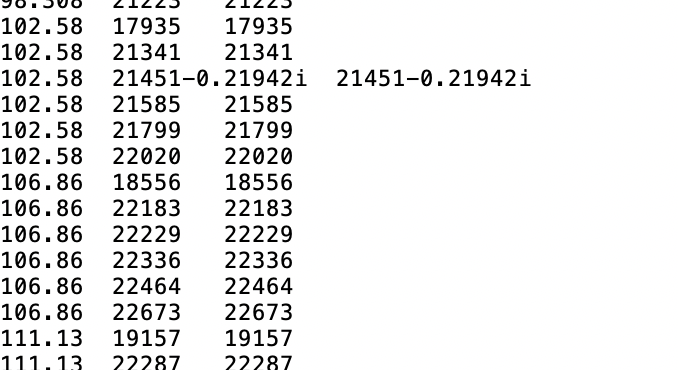

This is what happens for 8mm 
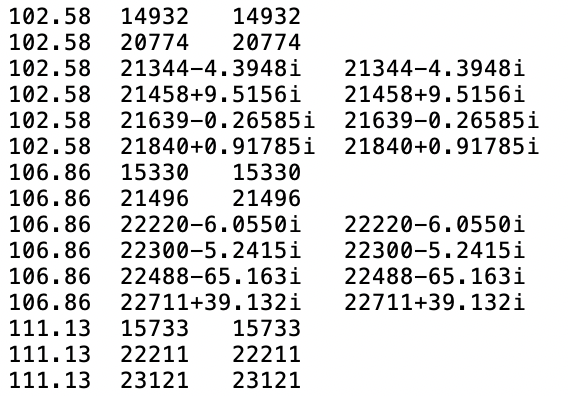

In [11]:
print(102.58/(2*np.pi))
print(106.86/(2*np.pi))

16.326114062366624
17.007297218799938


In [12]:
fig, ax = plt.subplots()
#ax.scatter(data_NoRes_hole0mm.k, data_NoRes_hole0mm.freq/1000,color='black',marker='.', label='No Hole')
ax.scatter(data_NoRes_6mmHole_dtop500nm.k, data_NoRes_6mmHole_dtop500nm.freq/1000,color='purple', marker='.',label='Hole = 6mm, distance from top = 500 nm')
#ax.scatter(data_NoRes_6mmHole_dtop1mm.k, data_NoRes_6mmHole_dtop1mm.freq/1000,color='blue', marker='.',label='Hole = 6mm, distance from top = 2mm', alpha=0.3)
ax.scatter(data_NoRes_6mmHole_dtop2mm.k, data_NoRes_6mmHole_dtop2mm.freq/1000,color='blue', marker='.',label='Hole = 6mm, distance from top = 2mm', alpha=0.3)
#ax.scatter(data_NoRes_6mmHole_dtop4mm.k, data_NoRes_6mmHole_dtop4mm.freq/1000,color='green', marker='.',label='Hole = 6mm, distance from top = 4mm')
ax.scatter(data_NoRes_6mmHole_dtop6mm.k, data_NoRes_6mmHole_dtop6mm.freq/1000,color='cyan', marker='.',label='Hole = 6mm, distance from top = 6mm')
#ax.scatter(data_NoRes_6mmHole_dtop8mm.k, data_NoRes_6mmHole_dtop8mm.freq/1000,color='cyan', marker='.',label='Hole = 6mm, distance from top = 8mm')
ax.scatter(data_NoRes_6mmHole_dtop10mm.k, data_NoRes_6mmHole_dtop10mm.freq/1000,color='orange', marker='.',label='Hole = 6mm, distance from top = 10mm')
#ax.scatter(data_NoRes_6mmHole_dtop20mm.k, data_NoRes_6mmHole_dtop20mm.freq/1000,color='red', marker='.',label='Hole = 6mm, distance from top = 20mm')
#ax.scatter(data_NoRes_6mmHole_dtop50mm.k, data_NoRes_6mmHole_dtop50mm.freq/1000,color='darkviolet', marker='.',label='Hole = 6mm, distance from top = 50mm')

#ax.scatter(data_NoRes_6mmHole_dtop4mm.k, data_NoRes_6mmHole_dtop4mm.freq/1000,color='green', marker='.',label='Hole = 6mm, distance from top = 4mm')

ax.plot(k_array,freq_cS/1000,'m--', label='Shear Wave')

plt.xlabel('Wavenumber [1/m]')
plt.ylabel('Frequency [kHz]')
plt.xlim([15,19])
plt.ylim([6,25])

crs = mplcursors.cursor(ax,hover=True)
crs.connect("add", lambda sel: sel.annotation.set_text(
    'Point {},{}'.format(sel.target[0], sel.target[1])))
plt.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …